# Variational autoencoder

In [ ]:
pip install --upgrade gdown

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for gdown: filename=gdown-3.13.0-cp37-none-any.whl size=9046 sha256=7a77d001dbedee73e3d9b9687b5e37c4cd122e0c30a67ca26f27cc6adcc1c330
  Stored in directory: /root/.cache/pip/wheels/ba/fa/c5/12813d7496f34652c43a471e11a780e769889d06e34735c32e
Successfully built gdown
  Found existing installation: gdown 3.6.4
    Uninstalling gdown-3.6.4:
      Successfully uninstalled gdown-3.6.4


In [ ]:
pip install google-colab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive

Mounted at /content/gdrive


**CelebA dataset**  
Í≥µÏãù Íµ¨Í∏Ä ÎìúÎùºÏù¥Î∏åÍ∞Ä ÏÇ¨Ïö©Ïö©ÎüâÏúºÎ°ú Îã§Ïö¥Î°úÎìúÍ∞Ä Î∂àÍ∞ÄÎä•Ìïú Í≤ΩÏö∞Í∞Ä ÏûàÏäµÎãàÎã§.  
ÎØ∏Îü¨ ÎßÅÌÅ¨ Îì±ÏùÑ Ïù¥Ïö©ÌïòÏãúÎ©¥ Îê©ÎãàÎã§.  


In [ ]:
import gdown
md5 = '00d2c5bc6d35e252742224ab0c1e8fcb'  
# official download link
url = 'https://drive.google.com/uc?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM'
# mirror url
url = 'https://drive.google.com/uc?id=1vsObPMdbOQwysIb-XulliKXqRSKrw6Iq'
output = '/mydrive/img_align_celeba.zip'
# output = 'img_align_celeba.zip'
gdown.cached_download(url, output, md5=md5)


Computing MD5: /mydrive/img_align_celeba.zip
MD5 matches: /mydrive/img_align_celeba.zip


'/mydrive/img_align_celeba.zip'

CelebA attribute data

In [ ]:
import gdown
md5 = '4414d5bdd90f37e4a8548c501e098835'  
# official download link
url = 'https://drive.google.com/uc?id=1epcRzi5e2IzuWhAMNaigYtyRhwUq72-2'
# output = '/mydrive/list_attr_celeba.csv'
output = 'list_attr_celeba.csv'
gdown.cached_download(url, output, md5=md5)

Cached Downloading: list_attr_celeba.csv
Downloading...
From: https://drive.google.com/uc?id=1epcRzi5e2IzuWhAMNaigYtyRhwUq72-2
To: /root/.cache/gdown/tmp9phcwhdb/dl
24.7MB [00:00, 121MB/s] 

Computing MD5: list_attr_celeba.csv
MD5 matches: list_attr_celeba.csv


'list_attr_celeba.csv'

In [ ]:
!mkdir -p vae_data/celeb
!mkdir -p vae_data/weights

In [ ]:
!unzip /mydrive/img_align_celeba.zip -d vae_data/celeb
# !unzip img_align_celeba.zip -d vae_data/celeb

Ïä§Ìä∏Î¶¨Î∞ç Ï∂úÎ†• ÎÇ¥Ïö©Ïù¥ Í∏∏Ïñ¥ÏÑú ÎßàÏßÄÎßâ 5000Ï§ÑÏù¥ ÏÇ≠Ï†úÎêòÏóàÏäµÎãàÎã§.
 extracting: vae_data/celeb/img_align_celeba/197600.jpg  
 extracting: vae_data/celeb/img_align_celeba/197601.jpg  
 extracting: vae_data/celeb/img_align_celeba/197602.jpg  
 extracting: vae_data/celeb/img_align_celeba/197603.jpg  
 extracting: vae_data/celeb/img_align_celeba/197604.jpg  
 extracting: vae_data/celeb/img_align_celeba/197605.jpg  
 extracting: vae_data/celeb/img_align_celeba/197606.jpg  
 extracting: vae_data/celeb/img_align_celeba/197607.jpg  
 extracting: vae_data/celeb/img_align_celeba/197608.jpg  
 extracting: vae_data/celeb/img_align_celeba/197609.jpg  
 extracting: vae_data/celeb/img_align_celeba/197610.jpg  
 extracting: vae_data/celeb/img_align_celeba/197611.jpg  
 extracting: vae_data/celeb/img_align_celeba/197612.jpg  
 extracting: vae_data/celeb/img_align_celeba/197613.jpg  
 extracting: vae_data/celeb/img_align_celeba/197614.jpg  
 extracting: vae_data/celeb/img_align_celeba/1

In [ ]:
!cp /mydrive/list_attr_celeba.csv vae_data/celeb
# !cp list_attr_celeba.csv vae_data/celeb

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, LeakyReLU, Flatten
from tensorflow.keras.layers import Dense, Conv2DTranspose
from tensorflow.keras.layers import Reshape, Activation
from tensorflow.keras.layers import BatchNormalization, Dropout
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler
import os
from glob import glob

In [ ]:
SAVE_FOLDER = 'vae_data'
DATA_FOLDER = SAVE_FOLDER + '/celeb/'

INPUT_DIM = (128,128,3)
BATCH_SIZE = 32

filenames = np.array(glob(os.path.join(DATA_FOLDER, '*/*.jpg')))

NUM_IMAGES = len(filenames)

mode =  'build' #'load' #
#mode =  'load' 

**ÌïôÏäµÏö© Data Generator**

In [ ]:
data_gen = ImageDataGenerator(rescale=1./255)

data_flow = data_gen.flow_from_directory(DATA_FOLDER
                                         , target_size = INPUT_DIM[:2]
                                         , batch_size = BATCH_SIZE
                                         , shuffle = True
                                         , class_mode = 'input'
                                         , subset = "training"
                                            )

Found 202599 images belonging to 1 classes.


**Sampling Î†àÏù¥Ïñ¥**  
standard normal distritubionÏù∏ $\epsilon$ ÏÉòÌîåÎßÅÏúºÎ°úÎ∂ÄÌÑ∞   
$\mu$ÏôÄ $\sigma$Ïùò Ï†ïÍ∑úÎ∂ÑÌè¨Î•º ÏÉùÏÑ±ÌïòÎäî Î†àÏù¥Ïñ¥  
$ N(\mu, \sigma) = \mu + \sigma N(0, 1) = \mu + \sigma\epsilon$  

In [ ]:
class Sampling(layers.Layer):
    """Uses (mu, log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        mu, log_var = inputs
        batch = tf.shape(mu)[0]
        dim = tf.shape(mu)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return mu + tf.exp(log_var/2) * epsilon

**Encoder Î™®Îç∏ Ï†ïÏùò**  
Latent spaceÏùò Ï∞®Ïõê: 200

In [ ]:
z_dim = 200
r_loss_factor = 10000

encoder_input = keras.Input(shape=INPUT_DIM, name='encoder_input')
x = Conv2D(32, 3, strides=2, padding="same", name='encoder_conv_0')(encoder_input)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Conv2D(64, 3, strides=2, padding="same", name='encoder_conv_1')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.25)(x)
x = Conv2D(64, 3, strides=2, padding="same", name='encoder_conv_2')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.25)(x)
x = Conv2D(64, 3, strides=2, padding="same", name='encoder_conv_3')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.25)(x)
shape_before_flattening = K.int_shape(x)[1:]
x = Flatten()(x)
mu = Dense(z_dim, name='mu')(x)
log_var = Dense(z_dim, name='log_var')(x)
z = Sampling(name='encoder_output')([mu, log_var])
encoder = keras.Model(encoder_input, [mu, log_var, z], name = 'encoder')
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
encoder_conv_0 (Conv2D)         (None, 64, 64, 32)   896         encoder_input[0][0]              
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 64, 64, 32)   128         encoder_conv_0[0][0]             
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 64, 64, 32)   0           batch_normalization[0][0]        
____________________________________________________________________________________________

**Decoder Î™®Îç∏ Ï†ïÏùò**


In [ ]:
decoder_input = keras.Input(shape=(z_dim,), name='decoder_input')
x = Dense(np.prod(shape_before_flattening))(decoder_input)
x = Reshape(shape_before_flattening)(x)
x = layers.Conv2DTranspose(64, 3, strides=2, padding="same", name='decoder_conv_t0')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.25)(x)
x = layers.Conv2DTranspose(64, 3, strides=2, padding="same", name='decoder_conv_t1')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.25)(x)
x = layers.Conv2DTranspose(32, 3, strides=2, padding="same", name='decoder_conv_t2')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.25)(x)
x = layers.Conv2DTranspose(3, 3, strides=2, padding="same", name='decoder_conv_t3')(x)
decoder_output = Activation('sigmoid')(x)
decoder = keras.Model(decoder_input, decoder_output, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 200)]             0         
_________________________________________________________________
dense (Dense)                (None, 4096)              823296    
_________________________________________________________________
reshape (Reshape)            (None, 8, 8, 64)          0         
_________________________________________________________________
decoder_conv_t0 (Conv2DTrans (None, 16, 16, 64)        36928     
_________________________________________________________________
batch_normalization_4 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 64)        0   

**Variational Autoencoder Î™®Îç∏ Ï†ïÏùò**  
`keras.Model` ÌÅ¥ÎûòÏä§Î•º ÏÉÅÏÜçÎ∞õÏïÑÏÑú ÏÉàÎ°ú Ï†ïÏùòÌï®  

$D_{KL}(p\parallel q)={1\over 2}\left(\sigma^2+\mu^2-2\log\sigma-1 \right )$  

In [ ]:

class VAEModel(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAEModel, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        #self.r_loss_factor = r_loss_factor

    def train_step(self, data):
        if isinstance(data, tuple):
            data = data[0]
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                #tf.square(data - reconstruction)
                keras.losses.binary_crossentropy(data, reconstruction)
            )
            reconstruction_loss *= r_loss_factor
            kl_loss = 1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            kl_loss *= -0.5
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        return {
            "loss": tf.reduce_mean(total_loss),
            "reconstruction_loss": tf.reduce_mean(reconstruction_loss),
            "kl_loss": tf.reduce_mean(kl_loss),
        }

    def call(self,inputs):
        _,_,latent = self.encoder(inputs)
        return self.decoder(latent)

In [ ]:
LEARNING_RATE = 0.0005
EPOCHS = 200
PRINT_EVERY_N_BATCHES = 100
INITIAL_EPOCH = 0

save_folder = os.path.join(SAVE_FOLDER, 'weights')

VAE = VAEModel(encoder, decoder)
VAE.compile(optimizer=keras.optimizers.Adam(lr=LEARNING_RATE))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
MODE = 'build'
#MODE = 'load'

if MODE == 'load':
    #ae = keras.models.load_model(save_folder, custom_objects={'r_loss': r_loss})
    VAE.load_weights(save_folder+'/'+'checkpoint')

**Train**

In [ ]:
def step_decay_schedule(initial_lr, decay_factor=0.5, step_size=1):
    '''
    Wrapper function to create a LearningRateScheduler with step decay schedule.
    '''
    def schedule(epoch):
        new_lr = initial_lr * (decay_factor ** np.floor(epoch/step_size))
        return new_lr

    return LearningRateScheduler(schedule)

checkpoint = ModelCheckpoint(save_folder+'/'+'checkpoint', save_weights_only = False, verbose=1)
lr_sched = step_decay_schedule(initial_lr=LEARNING_RATE, decay_factor=1, step_size=1)
callbacks_list = [checkpoint, lr_sched]

VAE.fit(
    data_flow,
    shuffle=True,
    epochs=EPOCHS,
    steps_per_epoch = NUM_IMAGES / BATCH_SIZE,
    callbacks=callbacks_list
)

Epoch 1/200
6175/6331 [============================>.] - ETA: 5s - loss: 5210.8567 - reconstruction_loss: 5095.7550 - kl_loss: 115.1017

KeyboardInterrupt: ignored

ÌïôÏäµÏù¥ ÏôÑÎ£åÎêú Î™®Îç∏ weights Ï†ÄÏû•

In [ ]:
x = np.random.rand(1, 128, 128, 3)
VAE.predict(x)
VAE.save(save_folder)

In [ ]:
!mkdir -p /mydrive/vae
!cp -r vae_data/weights /mydrive/vae

# !mkdir -p vae
# !cp -r vae_data/weights vae

ÎØ∏Î¶¨ ÌïôÏäµÎêú weights Îã§Ïö¥Î°úÎìú

In [ ]:
#md5 = 'f503e59c23309a6f3f6348befc0ecde0'  
#url = 'https://drive.google.com/uc?id=15C6ad4coHKqbh5mtPGwreub5pX_Mnw-f'
#output = 'vae_weights2.tar.gz'

md5 = 'b387a8f59bd8bc09ee1eb12a80294379'  
url = 'https://drive.google.com/uc?id=19m6cQVNqXRhD6iEGkjA8ZZcOdev_b2V1'
output = 'vae_weights.tar.gz'

gdown.cached_download(url, output, md5=md5)

Cached Downloading: vae_weights.tar.gz
Downloading...
From: https://drive.google.com/uc?id=19m6cQVNqXRhD6iEGkjA8ZZcOdev_b2V1
To: /root/.cache/gdown/tmpmnz52udz/dl
59.2MB [00:00, 74.9MB/s]

Computing MD5: vae_weights.tar.gz
MD5 matches: vae_weights.tar.gz


'vae_weights.tar.gz'

weights ÏïïÏ∂ï Ìï¥Ï†ú

In [ ]:
!tar xvzf vae_weights.tar.gz -C vae_data

weights/
weights/keras_metadata.pb
weights/checkpoint.data-00000-of-00001
weights/checkpoint.index
weights/variables/
weights/variables/variables.data-00000-of-00001
weights/variables/variables.index
weights/saved_model.pb
weights/checkpoint
weights/assets/


weights Î°úÎìú

In [ ]:
VAE.load_weights(save_folder+'/'+'checkpoint')

## VAE Î∂ÑÏÑù

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import norm
import pandas as pd

vae = VAE

In [ ]:
DATA_FOLDER = './vae_data/celeb/'
IMAGE_FOLDER = './vae_data/celeb/img_align_celeba/'

In [ ]:
class ImageLabelLoader():
    def __init__(self, image_folder, target_size):
        self.image_folder = image_folder
        self.target_size = target_size

    def build(self, att, batch_size, label = None):

        data_gen = ImageDataGenerator(rescale=1./255)
        if label:
            data_flow = data_gen.flow_from_dataframe(
                att
                , self.image_folder
                , x_col='image_id'
                , y_col=label
                , target_size=self.target_size
                , class_mode='raw'
                , batch_size=batch_size
                , shuffle=True
            )
        else:
            data_flow = data_gen.flow_from_dataframe(
                att
                , self.image_folder
                , x_col='image_id'
                , target_size=self.target_size
                , class_mode='input'
                , batch_size=batch_size
                , shuffle=True
            )

        return data_flow

In [ ]:
INPUT_DIM = (128,128,3)

att = pd.read_csv(os.path.join(DATA_FOLDER, 'list_attr_celeba.csv'))

imageLoader = ImageLabelLoader(IMAGE_FOLDER, INPUT_DIM[:2])

In [ ]:
att.head()

image_id  5_o_Clock_Shadow  ...  Wearing_Necktie  Young
0  000001.jpg                -1  ...               -1      1
1  000002.jpg                -1  ...               -1      1
2  000003.jpg                -1  ...               -1      1
3  000004.jpg                -1  ...               -1      1
4  000005.jpg                -1  ...               -1      1

[5 rows x 41 columns]

**Ïù¥ÎØ∏ÏßÄ Î≥µÏõê**

Found 202599 validated image filenames.


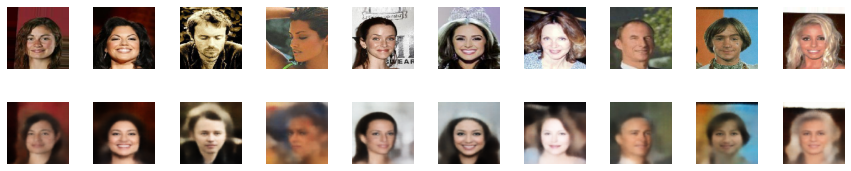

In [ ]:
n_to_show = 10

data_flow_generic = imageLoader.build(att, n_to_show)

example_batch = next(data_flow_generic)
example_images = example_batch[0]

_,_,z_points = vae.encoder.predict(example_images)

reconst_images = vae.decoder.predict(z_points)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i in range(n_to_show):
    img = example_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+1)
    sub.axis('off')        
    sub.imshow(img)

for i in range(n_to_show):
    img = reconst_images[i].squeeze()
    sub = fig.add_subplot(2, n_to_show, i+n_to_show+1)
    sub.axis('off')
    sub.imshow(img)

**ÏÉàÎ°ú ÏñºÍµ¥ ÏÉùÏÑ±ÌïòÍ∏∞**

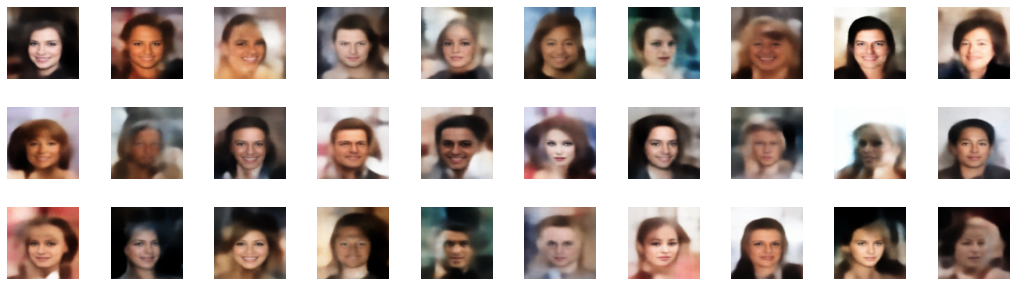

In [ ]:
z_dim = 200
n_to_show = 30

znew = np.random.normal(size = (n_to_show,z_dim))/1

reconst = vae.decoder.predict(np.array(znew))

fig = plt.figure(figsize=(18, 5))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(n_to_show):
    ax = fig.add_subplot(3, 10, i+1)
    ax.imshow(reconst[i, :,:,:])
    ax.axis('off')

plt.show()

In [ ]:
def get_vector_from_label(label, batch_size):

    data_flow_label = imageLoader.build(att, batch_size, label = label)

    origin = np.zeros(shape = z_dim, dtype = 'float32')
    current_sum_POS = np.zeros(shape = z_dim, dtype = 'float32')
    current_n_POS = 0
    current_mean_POS = np.zeros(shape = z_dim, dtype = 'float32')

    current_sum_NEG = np.zeros(shape = z_dim, dtype = 'float32')
    current_n_NEG = 0
    current_mean_NEG = np.zeros(shape = z_dim, dtype = 'float32')

    current_vector = np.zeros(shape = z_dim, dtype = 'float32')
    current_dist = 0

    print('label: ' + label)
    print('images : POS move : NEG move :distance : ùõ• distance')
    while(current_n_POS < 10000):

        batch = next(data_flow_label)
        im = batch[0]
        attribute = batch[1]

        _,_,z = vae.encoder.predict(np.array(im))

        z_POS = z[attribute==1]
        z_NEG = z[attribute==-1]

        if len(z_POS) > 0:
            current_sum_POS = current_sum_POS + np.sum(z_POS, axis = 0)
            current_n_POS += len(z_POS)
            new_mean_POS = current_sum_POS / current_n_POS
            movement_POS = np.linalg.norm(new_mean_POS-current_mean_POS)

        if len(z_NEG) > 0: 
            current_sum_NEG = current_sum_NEG + np.sum(z_NEG, axis = 0)
            current_n_NEG += len(z_NEG)
            new_mean_NEG = current_sum_NEG / current_n_NEG
            movement_NEG = np.linalg.norm(new_mean_NEG-current_mean_NEG)

        current_vector = new_mean_POS-new_mean_NEG
        new_dist = np.linalg.norm(current_vector)
        dist_change = new_dist - current_dist


        print(str(current_n_POS)
              + '    : ' + str(np.round(movement_POS,3))
              + '    : ' + str(np.round(movement_NEG,3))
              + '    : ' + str(np.round(new_dist,3))
              + '    : ' + str(np.round(dist_change,3))
             )

        current_mean_POS = np.copy(new_mean_POS)
        current_mean_NEG = np.copy(new_mean_NEG)
        current_dist = np.copy(new_dist)

        if np.sum([movement_POS, movement_NEG]) < 0.08:
            current_vector = current_vector / current_dist
            print('Found the ' + label + ' vector')
            break

    return current_vector   

In [ ]:
def add_vector_to_images(feature_vec):

    n_to_show = 5
    factors = [-4,-3,-2,-1,0,1,2,3,4]

    example_batch = next(data_flow_generic)
    example_images = example_batch[0]
    example_labels = example_batch[1]

    _,_,z_points = vae.encoder.predict(example_images)

    fig = plt.figure(figsize=(18, 10))

    counter = 1

    for i in range(n_to_show):

        img = example_images[i].squeeze()
        sub = fig.add_subplot(n_to_show, len(factors) + 1, counter)
        sub.axis('off')        
        sub.imshow(img)

        counter += 1

        for factor in factors:

            changed_z_point = z_points[i] + feature_vec * factor
            changed_image = vae.decoder.predict(np.array([changed_z_point]))[0]

            img = changed_image.squeeze()
            sub = fig.add_subplot(n_to_show, len(factors) + 1, counter)
            sub.axis('off')
            sub.imshow(img)

            counter += 1

    plt.show()

In [ ]:
BATCH_SIZE = 500

In [ ]:
# attractive_vec = get_vector_from_label('Attractive', BATCH_SIZE)
# mouth_open_vec = get_vector_from_label('Mouth_Slightly_Open', BATCH_SIZE)
# smiling_vec = get_vector_from_label('Smiling', BATCH_SIZE)
# lipstick_vec = get_vector_from_label('Wearing_Lipstick', BATCH_SIZE)
# young_vec = get_vector_from_label('High_Cheekbones', BATCH_SIZE)
# male_vec = get_vector_from_label('Male', BATCH_SIZE)
eyeglasses_vec = get_vector_from_label('Eyeglasses', BATCH_SIZE)
# blonde_vec = get_vector_from_label('Blond_Hair', BATCH_SIZE)

Found 202599 validated image filenames.
label: Eyeglasses
images : POS move : NEG move :distance : ùõ• distance
35    : 3.161    : 0.764    : 3.3    : 3.3
62    : 1.512    : 0.434    : 2.752    : -0.548
92    : 1.059    : 0.269    : 2.479    : -0.273
116    : 0.705    : 0.182    : 2.459    : -0.021
143    : 0.566    : 0.139    : 2.401    : -0.057
170    : 0.442    : 0.127    : 2.277    : -0.124
201    : 0.444    : 0.099    : 2.237    : -0.041
228    : 0.348    : 0.089    : 2.201    : -0.036
258    : 0.349    : 0.074    : 2.19    : -0.011
292    : 0.333    : 0.07    : 2.168    : -0.021
321    : 0.284    : 0.062    : 2.149    : -0.02
361    : 0.276    : 0.056    : 2.163    : 0.015
395    : 0.206    : 0.05    : 2.154    : -0.01
430    : 0.21    : 0.047    : 2.162    : 0.008
465    : 0.178    : 0.039    : 2.144    : -0.018
504    : 0.2    : 0.043    : 2.115    : -0.029
537    : 0.167    : 0.04    : 2.118    : 0.002
574    : 0.148    : 0.036    : 2.084    : -0.033
603    : 0.134    : 0.034

Eyeglasses Vector


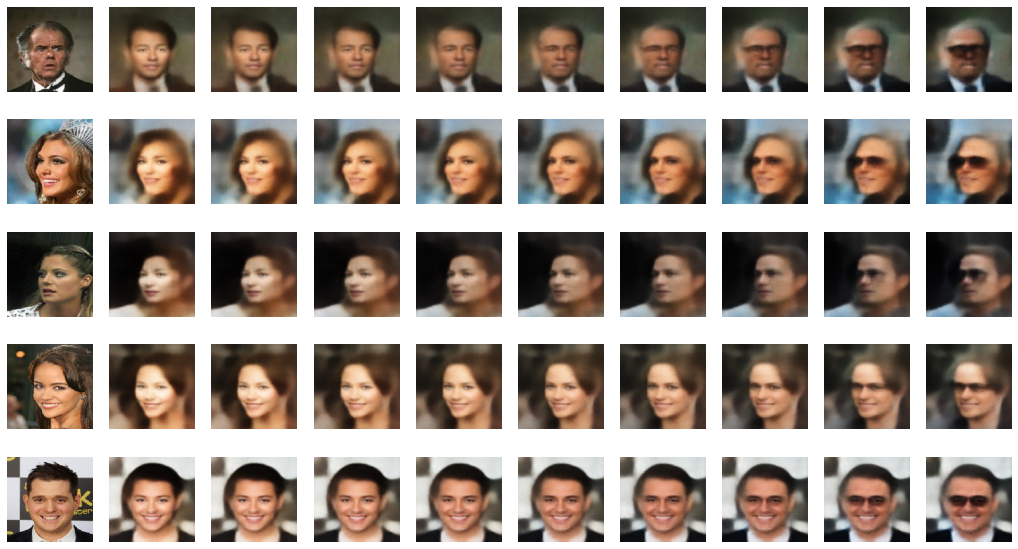

In [ ]:
# print('Attractive Vector')
# add_vector_to_images(attractive_vec)

# print('Mouth Open Vector')
# add_vector_to_images(mouth_open_vec)

# print('Smiling Vector')
# add_vector_to_images(smiling_vec)

# print('Lipstick Vector')
# add_vector_to_images(lipstick_vec)

# print('Young Vector')
# add_vector_to_images(young_vec)

# print('Male Vector')
# add_vector_to_images(male_vec)

print('Eyeglasses Vector')
add_vector_to_images(eyeglasses_vec)

# print('Blond Vector')
# add_vector_to_images(blonde_vec)

In [ ]:
def morph_faces(start_image_file, end_image_file):

    factors = np.arange(0,1,0.1)

    att_specific = att[att['image_id'].isin([start_image_file, end_image_file])]
    att_specific = att_specific.reset_index()
    data_flow_label = imageLoader.build(att_specific, 2)

    example_batch = next(data_flow_label)
    example_images = example_batch[0]
    example_labels = example_batch[1]

    _,_,z_points = vae.encoder.predict(example_images)


    fig = plt.figure(figsize=(18, 8))

    counter = 1

    img = example_images[0].squeeze()
    sub = fig.add_subplot(1, len(factors)+2, counter)
    sub.axis('off')        
    sub.imshow(img)

    counter+=1


    for factor in factors:

        changed_z_point = z_points[0] * (1-factor) + z_points[1]  * factor
        changed_image = vae.decoder.predict(np.array([changed_z_point]))[0]

        img = changed_image.squeeze()
        sub = fig.add_subplot(1, len(factors)+2, counter)
        sub.axis('off')
        sub.imshow(img)

        counter += 1

    img = example_images[1].squeeze()
    sub = fig.add_subplot(1, len(factors)+2, counter)
    sub.axis('off')        
    sub.imshow(img)


    plt.show()

Found 2 validated image filenames.


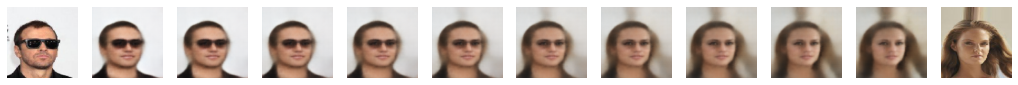

In [ ]:
start_image_file = '000238.jpg' 
end_image_file = '000193.jpg' #glasses

morph_faces(start_image_file, end_image_file)

Found 2 validated image filenames.


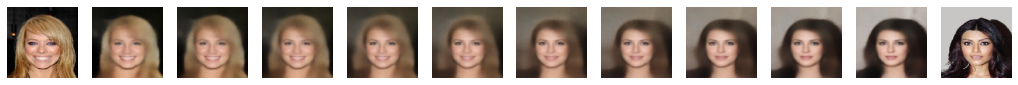

In [ ]:
start_image_file = '000112.jpg'
end_image_file = '000258.jpg'

morph_faces(start_image_file, end_image_file)

Found 2 validated image filenames.


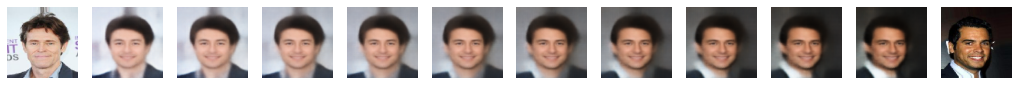

In [ ]:
start_image_file = '000230.jpg'
end_image_file = '000712.jpg'

morph_faces(start_image_file, end_image_file)

# Face swapping

Original source code from:  
https://github.com/EXJUSTICE/DeepFake_FaceSwap  

In [ ]:
!git clone -b tensorflow2.update --single-branch https://github.com/shevious/DeepFake_FaceSwap.git --depth=1

Cloning into 'DeepFake_FaceSwap'...
remote: Enumerating objects: 449, done.
remote: Counting objects: 100% (449/449), done.
remote: Compressing objects: 100% (446/446), done.
remote: Total 449 (delta 4), reused 443 (delta 3), pack-reused 0
Receiving objects: 100% (449/449), 11.86 MiB | 5.34 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [ ]:
%cd DeepFake_FaceSwap

/content/DeepFake_FaceSwap


In [ ]:
!mkdir -p obama-cut
!mkdir -p clinton-cut
!mkdir -p saved_model
!mkdir -p test

In [ ]:
pip install cmake

In [ ]:
pip install face_recognition

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100.2MB 59kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=26ee850a5480a80d759ce73510c1ade569fc9a3e5043708c9762772d2b9f3724
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
pip install scandir

  Created wheel for scandir: filename=scandir-1.10.0-cp37-cp37m-linux_x86_64.whl size=40757 sha256=303c03991091414acaf105f787dce7d3ba6512c660321640e7c88c3e1d028083
  Stored in directory: /root/.cache/pip/wheels/91/95/75/19c98a91239878abbc7c59970abd3b4e0438a7dd5b61778335
Successfully built scandir


In [ ]:
pip install opencv-python

In [ ]:
import cv2
from pathlib import Path
import face_recognition
from lib_1.PluginLoader import PluginLoader
from lib_1.faces_detect import detect_faces
from lib_1.FaceFilter import FaceFilter
import os

In [ ]:
input_directory="obama-jpg"
output_directory="obama-cut"
filter_file = 'filter/obamafilter.jpg'

In [ ]:
def load_filter():
    #filter_file = '../content/filter/obamafilter.jpg' # TODO Change argument here depending on what youre trying to extract
    if os.path.exists(filter_file):
        print('Loading reference image for filtering')
        return FaceFilter(filter_file)
    else:
        print("Filter not detected")

def get_faces(image):
    faces_count = 0
    filterDeepFake = load_filter()

    for face in detect_faces(image):

        if filterDeepFake is not None and not filterDeepFake.check(face):
            print('Skipping not recognized face!')
            continue


        yield faces_count, face

In [ ]:

from matplotlib import pyplot as plt
# from google.colab.patches import cv2_imshow

extractor_name = "Align" # TODO Pass as argument
extractor = PluginLoader.get_extractor(extractor_name)()

Loading Extract from Extract_Align plugin...


**ÏñºÍµ¥ Ïù¥ÎØ∏ÏßÄ Ï∂îÏ∂ú**

In [ ]:
"""

#Single Example test

example  ="../content/data/CR_2012.jpg"


image = cv2.imread(example)

for idx, face in get_faces(image):
           resized_image = extractor.extract(image, face, 256)
           output_file = output_directory+"/"+str(Path(example).stem)
           cv2.imwrite(str(output_file) + str(idx) + Path(example).suffix, resized_image)
"""
#Simply iterating over the folder is insufficient, imread needs paths, so create them into a list.


def find_all_files(directory):
    for root, dirs, files in os.walk(directory):

        for file in files:
            p=os.path.join(root, file)
            p=p.split("/")[len(p.split("/"))-2]
            name, ext = os.path.splitext(p)

            yield os.path.join(root, file)

folder_img = find_all_files(input_directory)
try:
    for filename in folder_img:
        image = cv2.imread(filename)
        print(filename)
        for idx, face in get_faces(image):
            print('extractor')
            resized_image = extractor.extract(image, face, 256)
            output_file = output_directory+"/"+str(Path(filename).stem)
            print('imwrite')
            cv2.imwrite(str(output_file) + str(idx) + Path(filename).suffix, resized_image)

except Exception as e:
    print('Failed to extract from image: {}. Reason: {}'.format(filename, e))

input_directory="clinton-jpg"
output_directory="clinton-cut"
filter_file = 'filter/clintonfilter.jpg'

folder_img = find_all_files(input_directory)
try:
    for filename in folder_img:
        image = cv2.imread(filename)
        print(filename)
        for idx, face in get_faces(image):
            print('extractor')
            resized_image = extractor.extract(image, face, 256)
            output_file = output_directory+"/"+str(Path(filename).stem)
            print('imwrite')
            cv2.imwrite(str(output_file) + str(idx) + Path(filename).suffix, resized_image)

except Exception as e:
    print('Failed to extract from image: {}. Reason: {}'.format(filename, e))

obama-jpg/164.jpg
Loading reference image for filtering
-----
check
[0.33928473]
extractor
imwrite
obama-jpg/043.jpg
Loading reference image for filtering
-----
check
[0.34081013]
extractor
imwrite
obama-jpg/030.jpg
Loading reference image for filtering
-----
check
[0.40629661]
extractor
imwrite
obama-jpg/091.jpg
Loading reference image for filtering
-----
check
[0.43430513]
extractor
imwrite
obama-jpg/006.jpg
Loading reference image for filtering
-----
check
[0.34260841]
extractor
imwrite
check
No faces found in the image!
0.8
Skipping not recognized face!
obama-jpg/102.jpg
Loading reference image for filtering
-----
check
[0.28352454]
extractor
imwrite
obama-jpg/167.jpg
Loading reference image for filtering
-----
check
[0.28692467]
extractor
imwrite
obama-jpg/172.jpg
Loading reference image for filtering
-----
check
[0.36425869]
extractor
imwrite
obama-jpg/122.jpg
Loading reference image for filtering
-----
check
[0.32092847]
extractor
imwrite
obama-jpg/130.jpg
Loading reference imag

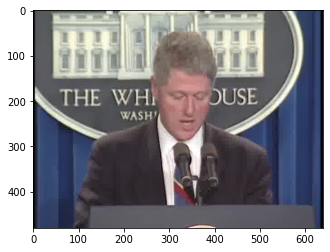

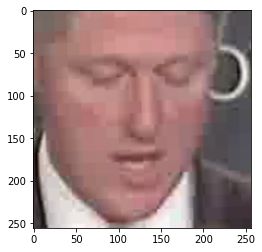

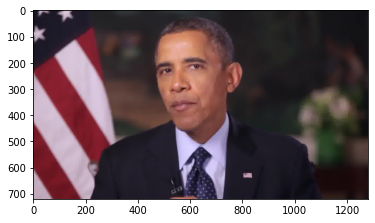

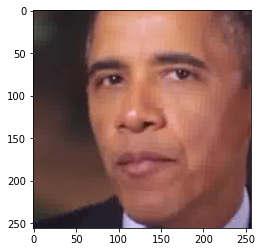

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mp_image

img = mp_image.imread('clinton-jpg/076.jpg')
plt.imshow(img)
plt.show()
img = mp_image.imread('clinton-cut/0760.jpg')
plt.imshow(img)
plt.show()
img = mp_image.imread('obama-jpg/076.jpg')
plt.imshow(img)
plt.show()
img = mp_image.imread('obama-cut/0760.jpg')
plt.imshow(img)
plt.show()

## ÌïôÏäµÌïòÍ∏∞

In [ ]:
import gdown
md5 = 'd1b5f39e88b70cd3661b73b36f296586'  
# pretrained weights for speed up
url = 'https://drive.google.com/uc?id=1biKvZSxV-Dx9mUX-UMaFcZ6J8OMQ9MHQ'
output = 'weights2.zip'
gdown.cached_download(url, output, md5=md5)

Cached Downloading: weights2.zip
Downloading...
From: https://drive.google.com/uc?id=1biKvZSxV-Dx9mUX-UMaFcZ6J8OMQ9MHQ
To: /root/.cache/gdown/tmpwy3j4lnm/dl
304MB [00:04, 61.9MB/s]


Computing MD5: weights2.zip
MD5 matches: weights2.zip


'weights2.zip'

In [ ]:
!unzip weights2.zip

Archive:  weights2.zip
   creating: weight/
  inflating: weight/decoder_A.h5     
  inflating: weight/decoder_B.h5     
  inflating: weight/encoder.h5       


In [ ]:
import cv2
import numpy
import time

from pathlib import Path
from scandir import scandir

from keras.models import Model as KerasModel
from keras.layers import Input, Dense, Flatten, Reshape
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D
# from keras.optimizers import Adam
# from tensorflow.python.keras.optimizer_v2.adam import Adam
from tensorflow.keras.optimizers import Adam

from lib_1.PixelShuffler import PixelShuffler
import time
import numpy
from lib_1.training_data import minibatchAB, stack_images

In [ ]:

sav_Model="saved_model"
pretrained_weight="weight"
# Í≥ÑÏÜçÌï¥ÏÑú trainÌï† Í≤ΩÏö∞ ÏïÑÎûòÏùò Ï†ÄÏû• Ìè¥ÎçîÎ•º Ïù¥Ïö©
#pretrained_weight="saved_model"
image_actor_A_directory="obama-cut" #ORIGINAL
image_actor_B_directory="clinton-cut" #TARGET TO REPLACE WITH
batch_size=32
save_interval=500
ENCODER_DIM = 1024


#DON'T MODIFY
image_extensions = [".jpg", ".jpeg", ".png"]
encoderH5 = '/encoder.h5'
decoder_AH5 = '/decoder_A.h5'
decoder_BH5 = '/decoder_B.h5'
IMAGE_SHAPE = (64, 64, 3)

In [ ]:
class dfModel():
    def __init__(self):
        self.model_dir = sav_Model
        self.pretrained_weight=pretrained_weight
        self.encoder = self.Encoder()
        self.decoder_A = self.Decoder()
        self.decoder_B = self.Decoder()

        self.initModel()

    def initModel(self):
        optimizer = Adam(lr=5e-5, beta_1=0.5, beta_2=0.999) #orig adam 5e-5
        x = Input(shape=IMAGE_SHAPE)

        self.autoencoder_A = KerasModel(x, self.decoder_A(self.encoder(x)))
        self.autoencoder_B = KerasModel(x, self.decoder_B(self.encoder(x)))
        print(self.encoder.summary())
        print(self.decoder_A.summary())

        self.autoencoder_A.compile(optimizer=optimizer, loss='mean_absolute_error')
        self.autoencoder_B.compile(optimizer=optimizer, loss='mean_absolute_error')

    def converter(self, swap):
        autoencoder = self.autoencoder_B if not swap else self.autoencoder_A
        return lambda img: autoencoder.predict(img)

    def conv(self, filters):
        def block(x):
            x = Conv2D(filters, kernel_size=5, strides=2, padding='same')(x)
            x = LeakyReLU(0.1)(x)
            return x
        return block

    def upscale(self, filters):
        def block(x):
            x = Conv2D(filters * 4, kernel_size=3, padding='same')(x)
            x = LeakyReLU(0.1)(x)
            x = PixelShuffler()(x)
            #Pixelshufflers job here is analoguous to upsampling2d
            return x
        return block

    #Note how no maxpooling after every layer here, we are generating a WARPED image, not a lower dimensional representation first.
    def Encoder(self):
        input_ = Input(shape=IMAGE_SHAPE)
        x = input_
        x = self.conv(128)(x)
        x = self.conv(256)(x)
        x = self.conv(512)(x)
        x = self.conv(1024)(x)
        x = Dense(ENCODER_DIM)(Flatten()(x))
        x = Dense(4 * 4 * 1024)(x)
        #Passed flattened X input into 2 dense layers, 1024 and 1024*4*4
        x = Reshape((4, 4, 1024))(x)
        #Reshapes X into 4,4,1024
        x = self.upscale(512)(x)
        return KerasModel(input_, x)

    def Decoder(self):
        input_ = Input(shape=(8, 8, 512))
        x = input_
        x = self.upscale(256)(x) #Actually 1024 given filters*4
        x = self.upscale(128)(x) #Actually 512
        x = self.upscale(64)(x) #Actually 256
        x = Conv2D(3, kernel_size=5, padding='same', activation='sigmoid')(x)
        return KerasModel(input_, x)

    def load(self, swapped):
        (face_A,face_B) = (decoder_AH5, decoder_BH5) if not swapped else (decoder_BH5, decoder_AH5)
        try:
            self.encoder.load_weights(self.pretrained_weight + encoderH5)
            self.decoder_A.load_weights(self.pretrained_weight + face_A)
            self.decoder_B.load_weights(self.pretrained_weight + face_B)
            print('loaded model weights')
            return True
        except Exception as e:
            print('Failed loading existing training data.')
            print(e)
            return False
            
    def save_weights(self):
        self.encoder.save_weights(self.model_dir + encoderH5)
        self.decoder_A.save_weights(self.model_dir + decoder_AH5)
        self.decoder_B.save_weights(self.model_dir + decoder_BH5)
        print('saved model weights')


In [ ]:
class Trainer():
    def __init__(self, model, fn_A, fn_B, batch_size=64):
        self.batch_size = batch_size
        self.model = model
        self.images_A = minibatchAB(fn_A, self.batch_size)
        self.images_B = minibatchAB(fn_B, self.batch_size)

    def train_one_step(self, iter):
        epoch, warped_A, target_A = next(self.images_A)
        epoch, warped_B, target_B = next(self.images_B)

        loss_A = self.model.autoencoder_A.train_on_batch(warped_A, target_A)
        loss_B = self.model.autoencoder_B.train_on_batch(warped_B, target_B)
        print("[{0}] [#{1:05d}] loss_A: {2:.5f}, loss_B: {3:.5f}".format(time.strftime("%H:%M:%S"), iter, loss_A, loss_B),
            end='\r')

In [ ]:
def get_image_paths(directory):
    return [x.path for x in scandir(directory) if
     any(map(lambda ext: x.name.lower().endswith(ext), image_extensions))]

In [ ]:
model = dfModel()
model.load(swapped=False)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 128)       9728      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 32, 32, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 256)       819456    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 512)         3277312   
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 8, 8, 512)         0     

True

In [ ]:
images_A = get_image_paths(image_actor_A_directory)
images_B = get_image_paths(image_actor_B_directory)
trainer = Trainer(model,images_A,images_B,batch_size=batch_size)

for epoch in range(0, 1000000):

    save_iteration = epoch % save_interval == 0

    trainer.train_one_step(epoch)

    if save_iteration:
        print('epoch =', epoch)
        model.save_weights()

epoch = 0
saved model weights
epoch = 500
saved model weights
epoch = 1000
saved model weights
epoch = 1500
saved model weights
epoch = 2000
saved model weights
epoch = 2500
saved model weights
epoch = 3000
saved model weights
epoch = 3500
saved model weights
epoch = 4000
saved model weights
epoch = 4500
saved model weights
epoch = 5000
saved model weights
epoch = 5500
saved model weights
epoch = 6000
saved model weights
epoch = 6500
saved model weights
epoch = 7000
saved model weights
epoch = 7500
saved model weights
epoch = 8000
saved model weights
epoch = 8500
saved model weights
epoch = 9000
saved model weights
epoch = 9500
saved model weights
epoch = 10000
saved model weights
epoch = 10500
saved model weights
epoch = 11000
saved model weights
epoch = 11500
saved model weights
epoch = 12000
saved model weights
epoch = 12500
saved model weights
epoch = 13000
saved model weights
epoch = 13500
saved model weights
epoch = 14000
saved model weights
epoch = 14500
saved model weights
epoc

## ÏÉùÏÑ±ÌïòÍ∏∞

In [ ]:
import gdown
md5 = 'b2b747e22727313ed5f64323a6e041ee'  
# ÌïôÏäµÌïòÍ∏∞
url = 'https://drive.google.com/uc?id=1DbGpF_nhVJMeRaVcSVZRh1I1xfp7_dAj'
output = 'saved_model_obama.tar.gz'
gdown.cached_download(url, output, md5=md5)

In [ ]:
!tar xvzf saved_model_obama.tar.gz

In [ ]:

import cv2
import re
from pathlib import Path
from lib_1.utils import BackgroundGenerator, get_image_paths, get_folder
from lib_1.faces_detect import detect_faces
from lib_1.FaceFilter import FaceFilter
from tqdm import tqdm
from lib_1.PluginLoader import PluginLoader

#os.run_line_magic('pylab', 'inline')
import matplotlib.pyplot as plt

from keras.models import Model as KerasModel
from keras.layers import Input, Dense, Flatten, Reshape
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import Conv2D
from keras.optimizers import Adam
from lib_1.PixelShuffler import PixelShuffler

In [ ]:
# We define the caracteristics of our network:
#    * model_dir: the location of the model (it needs to be the absolute path)
#    * conv_name: the kind of converter to use ("Masked" or "Adjust")
#    * swap_model: Swap the model. Instead of A -> B, swap B -> A.
#    * blur_size: Blur size. (it only work for Masked converter)
#    * seamless_clone: Seamless mode
#    * mask_type: the type of mask to use to replace faces.("rect", "facehull", "facehullandrect")
#    * erosion_kernel_size: the erosion kernel size. (it only work for the masked converter)
#    * smooth_mask: use Smooth mask (it only work for the Adjust converter)
#    * avg_color_adjust: average the color (it only work for the Adjust converter)
#    * input_dir: the location of the input images (it needs to be the absolute path)
#    * output_dir: the location of the output images (it needs to be the absolute path)
#    * filter_image: the image that will be used to filter faces 
#    
# I invite you to try different parameter until you get a satifying result.

#model_dir="saved_model"
#model_dir="weights" # ÎàÑÍµ¨ÏùºÍπåÏöî?
model_dir='saved_model_obama'
conv_name = "Masked"
swap_model= False
blur_size=2
#seamless_clone=False
seamless_clone=True
mask_type="facehullandrect"
erosion_kernel_size=None
smooth_mask=True
avg_color_adjust=True
input_dir="obama-jpg"
output_dir="test"
filter_image="filter/obamafilter.jpg"

In [ ]:
#DONT MODIFY 
IMAGE_SHAPE = (64, 64, 3)
ENCODER_DIM = 1024
encoderH5 = '/encoder.h5'
decoder_AH5 = '/decoder_A.h5'
decoder_BH5 = '/decoder_B.h5'
model_name = "Original" # TODO Pass as argument

In [ ]:
def load_filter():
    filter_file = filter_image # TODO Pass as argument
    if Path(filter_file).exists():
        print('Loading reference image for filtering')
        return FaceFilter(filter_file)

def get_faces(image):
    faces_count = 0
    filterDeepFake = load_filter()
    extractor = PluginLoader.get_extractor("Align")()
    for face in detect_faces(image):
        if filterDeepFake is not None and not filterDeepFake.check(face):
            print('Skipping not recognized face!')
            continue
        resized_image = extractor.extract(image, face, 256)

        yield faces_count, face
        faces_count +=1

def get_list_images_faces():
    input_list = get_image_paths(input_dir)
    listFile=[]
    for filename in tqdm(input_list):
        listFile.append(filename)
    for filename in listFile:
        image = cv2.imread(filename)
        yield filename, image, get_faces(image)

`converter.patch_image(image, face)` Ìï®ÏàòÎ•º ÌÜµÌïòÏó¨ Î™®Îç∏ÏùÑ Ïã§Ìñâ  


In [ ]:
def convert(converter, item):
    try:
        (filename, image, faces) = item
        for idx, face in faces:
            image1 = converter.patch_image(image, face)
        output_file = str(output_dir)+ str("/")+ str(Path(filename).name)

        cv2.imwrite(str(output_file), image1)
    except Exception as e:
        print('Failed to convert image: {}. Reason: {}'.format(filename, e))

`lib_1/Convert_Masked.py` Î∞úÏ∑åÎ≥∏

In [ ]:
import cv2
import numpy

from lib_1.aligner import get_align_mat

class Convert():
    def __init__(self, encoder, blur_size=2, seamless_clone=False, mask_type="facehullandrect", erosion_kernel_size=None, **kwargs):
        self.encoder = encoder

        self.erosion_kernel = None
        if erosion_kernel_size is not None:
            self.erosion_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(erosion_kernel_size,erosion_kernel_size))

        self.blur_size = blur_size
        self.seamless_clone = seamless_clone
        self.mask_type = mask_type.lower() # Choose in 'FaceHullAndRect','FaceHull','Rect'

    def patch_image( self, image, face_detected ):
        size = 64
        image_size = image.shape[1], image.shape[0]

        mat = numpy.array(get_align_mat(face_detected)).reshape(2,3) * size

        new_face = self.get_new_face(image,mat,size)

        image_mask = self.get_image_mask( image, new_face, face_detected, mat, image_size )

        return self.apply_new_face(image, new_face, image_mask, mat, image_size, size)

    def apply_new_face(self, image, new_face, image_mask, mat, image_size, size):
        base_image = numpy.copy( image )
        new_image = numpy.copy( image )

        outImage = None
        if self.seamless_clone:
            masky,maskx = cv2.transform( numpy.array([ size/2,size/2 ]).reshape(1,1,2) ,cv2.invertAffineTransform(mat) ).reshape(2).astype(int)
            outimage = cv2.seamlessClone(new_image.astype(numpy.uint8),base_image.astype(numpy.uint8),(image_mask*255).astype(numpy.uint8),(masky,maskx) , cv2.NORMAL_CLONE )
        else:
            foreground = cv2.multiply(image_mask, new_image.astype(float))
            background = cv2.multiply(1.0 - image_mask, base_image.astype(float))
            outimage = cv2.add(foreground, background)

        return outimage

    def get_new_face(self, image, mat, size):
        face = cv2.warpAffine( image, mat, (size,size) )
        face = numpy.expand_dims( face, 0 )
        new_face = self.encoder( face / 255.0 )[0]

        return numpy.clip( new_face * 255, 0, 255 ).astype( image.dtype )

    def get_image_mask(self, image, new_face, face_detected, mat, image_size):

        face_mask = numpy.zeros(image.shape,dtype=float)
        if 'rect' in self.mask_type:
            face_src = numpy.ones(new_face.shape,dtype=float)
            cv2.warpAffine( face_src, mat, image_size, face_mask, cv2.WARP_INVERSE_MAP, cv2.BORDER_TRANSPARENT )

        hull_mask = numpy.zeros(image.shape,dtype=float)
        if 'hull' in self.mask_type:
            hull = cv2.convexHull( numpy.array( face_detected.landmarksAsXY() ).reshape((-1,2)).astype(int) ).flatten().reshape( (-1,2) )
            cv2.fillConvexPoly( hull_mask,hull,(1,1,1) )

        if self.mask_type == 'rect':
            image_mask = face_mask
        elif self.mask_type == 'faceHull':
            image_mask = hull_mask
        else:
            image_mask = ((face_mask*hull_mask))
            
        if self.erosion_kernel is not None:
            image_mask = cv2.erode(image_mask,self.erosion_kernel,iterations = 1)

        if self.blur_size!=0:
            image_mask = cv2.blur(image_mask,(self.blur_size,self.blur_size))

        return image_mask

ÌïôÏäµÎ™®Îç∏Í≥º ÎèôÏùºÌïú ÏÉùÏÑ±Î™®Îç∏  
(loadÏóêÏÑú weightÍ∞ÄÏ†∏Ïò§Îäî Î∂ÄÎ∂ÑÎßå Îã§Î¶Ñ)  

In [ ]:
class Model():
    def __init__(self):

        self.model_dir = model_dir
        self.encoder = self.Encoder()
        self.decoder_A = self.Decoder()
        self.decoder_B = self.Decoder()

        self.initModel()

    def initModel(self):
        optimizer = Adam(lr=5e-5, beta_1=0.5, beta_2=0.999)
        x = Input(shape=IMAGE_SHAPE)

        self.autoencoder_A = KerasModel(x, self.decoder_A(self.encoder(x)))
        self.autoencoder_B = KerasModel(x, self.decoder_B(self.encoder(x)))

        self.autoencoder_A.compile(optimizer=optimizer, loss='mean_squared_error')
        self.autoencoder_B.compile(optimizer=optimizer, loss='mean_squared_error')

    def converter(self, swap):
        autoencoder = self.autoencoder_B if not swap else self.autoencoder_A
        return lambda img: autoencoder.predict(img)

    def conv(self, filters):
        def block(x):
            x = Conv2D(filters, kernel_size=5, strides=2, padding='same')(x)
            x = LeakyReLU(0.1)(x)
            return x
        return block

    def upscale(self, filters):
        def block(x):
            x = Conv2D(filters * 4, kernel_size=3, padding='same')(x)
            x = LeakyReLU(0.1)(x)
            x = PixelShuffler()(x)
            return x
        return block


    def Encoder(self):
        input_ = Input(shape=IMAGE_SHAPE)
        x = input_
        x = self.conv(128)(x)
        x = self.conv(256)(x)
        x = self.conv(512)(x)
        x = self.conv(1024)(x)
        x = Dense(ENCODER_DIM)(Flatten()(x))
        x = Dense(4 * 4 * 1024)(x)
        x = Reshape((4, 4, 1024))(x)
        x = self.upscale(512)(x)
        return KerasModel(input_, x)

    def Decoder(self):
        input_ = Input(shape=(8, 8, 512))
        x = input_
        x = self.upscale(256)(x)
        x = self.upscale(128)(x)
        x = self.upscale(64)(x)
        x = Conv2D(3, kernel_size=5, padding='same', activation='sigmoid')(x)
        return KerasModel(input_, x)

    def load(self, swapped):
        (face_A,face_B) = (decoder_AH5, decoder_BH5) if not swapped else (decoder_BH5, decoder_AH5)

        try:
            self.encoder.load_weights(self.model_dir + encoderH5)
            self.decoder_A.load_weights(self.model_dir + face_A)
            self.decoder_B.load_weights(self.model_dir + face_B)
            print('loaded model weights')
            return True
        except Exception as e:
            print('Failed loading existing training data.')
            print(e)
            return False

    def save_weights(self):
        self.encoder.save_weights(self.model_dir + encoderH5)
        self.decoder_A.save_weights(self.model_dir + decoder_AH5)
        self.decoder_B.save_weights(self.model_dir + decoder_BH5)
        print('saved model weights')

3Îã®Í≥ÑÎ°ú face swap ÏßÑÌñâ:  
    1. `PluginLoader.get_model(model_name)(model_dir)`ÏùÑ ÌÜµÌïòÏó¨ Î™®Îç∏ ÏÑ†Ïñ∏    
    2. ÏïûÏóêÏÑú ÌïôÏäµÌïú Î™®Îç∏ weightsÎ•º Î°úÎî©    
    3. ÏûÖÎ†• ÏòÅÏÉÅÏúºÎ°úÎ∂ÄÌÑ∞ ÏñºÍµ¥Ïùò ÌäπÏßïÏùÑ `get_list_images_faces`Î•º Ïù¥Ïö©ÌïòÏó¨ Ï∂îÏ∂ú  
    4. `convert(converter, item)`Î•º ÌÜµÌïòÏó¨ Î™®Îç∏ÏùÑ Ìò∏Ï∂úÌïòÍ≥† maskÎ•º Ïù¥Ïö©Ìïú face swapping ÏàòÌñâ    


In [ ]:
model = Model()
if not model.load(swap_model):
    print('Model Not Found! A valid model must be provided to continue!')
    exit(1)

faceswap_converter = PluginLoader.get_converter(conv_name)(model.converter(False),
    blur_size=blur_size,
    seamless_clone=seamless_clone,
    mask_type=mask_type,
    erosion_kernel_size=erosion_kernel_size,
    smooth_mask=smooth_mask,
    avg_color_adjust=avg_color_adjust
)

list_faces=get_list_images_faces()


batch = BackgroundGenerator(list_faces, 1)

for item in batch.iterator():
    convert(faceswap_converter, item)

In [ ]:
!ls test

bond.jpg				      CR_2012.jpg
Casino-Royale-Eva-Green-Daniel-Craig.jpg      daniel-craig-casino-royale.jpg
casino_royale_movie_image_james_bond__1_.jpg  james-bond-casino-royale.jpg
Casino-Royale-Three-Piece-1000x524.jpg	      skyfall.jpg


In [ ]:
import matplotlib.image as mp_image
import matplotlib.pyplot as plt

img_path = '048.jpg'
orgface = mp_image.imread('obama-jpg/'+img_path)
newface = mp_image.imread('test/'+img_path)
plt.figure(figsize=(12,8))
plt.subplot('121')
plt.imshow(orgface)
plt.subplot('122')
plt.imshow(newface)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'test/048.jpg'

**ÎèôÏòÅÏÉÅ ÎßåÎì§Í∏∞ Í∞úÏöî**  
1. mp4 Îã§Ïö¥Î°úÎìú  
2. ffmpegÏùÑ Ïù¥Ïö©ÌïòÏó¨ Î™®Îì† frame Ï∂îÏ∂ú  
   `ffmpeg -i ../obama.mp4 file%04d.jpg`  
3. faceswap Ïã§Ìñâ  
4. Î≥ÄÌôòÎêú Ïù¥ÎØ∏ÏßÄÎ•º Îã§Ïãú ÎèôÏòÅÏÉÅÏúºÎ°ú Ïù∏ÏΩîÎî©  
   `ffmpeg -framerate 29.97 -pattern_type glob -i '*.jpg' ../obama-swap.mp4`  